# Actividad 1

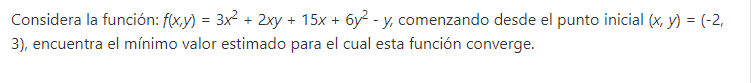

In [ ]:
import numpy as np
import numpy.linalg as npl
import sympy as sym
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [ ]:
#creamos las variable x and y 
X, y = sym.symbols("x y")

In [ ]:
funcion = 3*X**2 + 2*X*y + 15*X +6 *y**2
funcion

3*x**2 + 2*x*y + 15*x + 6*y**2

In [ ]:
#Tranformacion la expresion a un funcion que se puede realizar operaciones 
f = sym.lambdify('x,y',funcion)

In [ ]:
#Hacemos una prueba 
f(1,6)

246

In [ ]:
puntoInicio = np.vstack([-2,3])
puntoInicio

array([[-2],
       [ 3]])

In [ ]:
#La gradiente son las derivadas parciales de la funcion 
f1x = funcion.diff(X)
f1xLam = sym.lambdify('x,y',f1x)
f1y = funcion.diff(y)
f1yLam = sym.lambdify('x,y',f1y)
f1 = [f1x,f1y]
gradiente = sym.lambdify('x,y',f1)


In [ ]:
#Vemos la derivada a base de x 
f1x

6*x + 2*y + 15

In [ ]:
#Realizamos una prueba
f1xLam(1,1)

23

In [ ]:
f1y

2*x + 12*y

In [ ]:
f1yLam(1,1)

14

In [ ]:
#Vemos que F1 tiene las dos derivadas 
f1

[6*x + 2*y + 15, 2*x + 12*y]

In [ ]:
#gradiente toma f1 y le pasamos el parametro de x and y , y realizar la operacion 
gradiente(1,1)

[23, 14]

In [ ]:
#gereramos un conjunto de datos a partir de la funcion
l = 4
n = 150
linspace = np.linspace(-l,l,n) 

#
X,Y = np.meshgrid(linspace,linspace)

#evaluar todos los puntos 
Z = f(X,Y)


/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


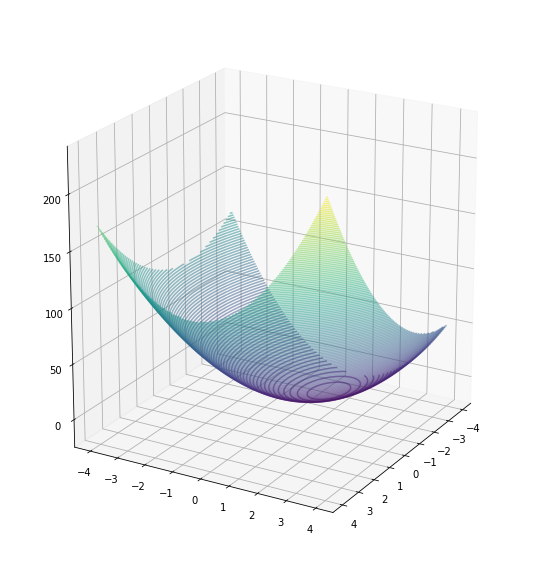

In [ ]:
#
fig = plt.figure(figsize = (15,16), tight_layout = True)
gs = GridSpec(2, 2)
ax = fig.add_subplot(gs[1,0], projection='3d')
ax.contour3D(X,Y,Z, n, alpha = .5)
ax.view_init(20, 30);

In [ ]:
#Declaramos la funcion que nos permite traer el valor minimo
def gradientDescent(gradiente, punto_inicio, tamaño_paso = .085, precision = .01, max_iter = 3000, initError = 10):
    # configuracion inicial
    x,y = punto_inicio.astype(float)
    currIter, iterCoords = 0, [np.hstack([x,y])]
    error = initError
    currX = np.array([x,y])

    # inicio de las iteraciones
    
    while npl.norm(error) > precision and currIter<max_iter:
        currIter+=1 # se incrementa el contador
        prevX = currX.copy() # registra el ultimo valor de error
        
        # Gradient descent equation
        currX -= tamaño_paso * np.array(gradiente(x,y)) # New X = (last) minus (step size * function gradient(last)).
        x,y = currX[0].copy(), currX[1].copy() # Update X.
        # Gradient descent equation
        
        error = currX - prevX # Error based on how much movement new X made based on gamma and gradient.
        iterCoords.append(np.hstack([x,y])) # Track X for plotting.
        
    return currIter, currX, np.vstack(iterCoords)

In [ ]:
pasos_totales, coordenada_final, coordenadas_intermedias = gradientDescent(gradiente,puntoInicio)
print(pasos_totales)
print(coordenada_final)
coordenadas_intermedias[:5]

4
[[-2.65709361]
 [ 0.44428664]]


array([[-2.        ,  3.        ],
       [-2.765     ,  0.28      ],
       [-2.67745   ,  0.46445   ],
       [-2.665907  ,  0.4458775 ],
       [-2.65709361,  0.44428664]])

# Actividad 2

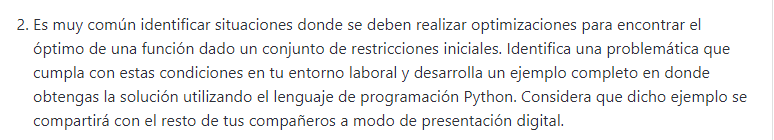

## Problema

El precio de un sistema de energía solar es dado por:

$$U=35A +208V$$

dónde $A$ es la superficie del collector y $V$ es el volumen de la bateria que almacena la energía. Debido a consideraciones de balance de energía, se debe considerar que: 

$$A\left(290 - \frac{100}{V}\right) = 5833.3$$

Adicionalmente, el volumen de la batería $V$ está relacionado a la temperatura de operación del sistema $T$, y está configurado tal que:

$$V=\frac{50}{T-20}$$

Los proveedores de batería únicamente proveen modelos que trabajan entre 40 y 90 grados centígrados. Se desea optmizar el costo $U$ considerando todas las limitaciones presentadas.

## Solución

Juntando todas las expresiones y expresando en términos de $T$, tenemos la siguiente ecuación:

$$U=\frac{204165.5}{330 - 2T} + \frac{10400}{T - 20}$$

Puesto que la temperatura $T$ está limitada al rango $[40, 90]$, la función será ploteada en este rango.

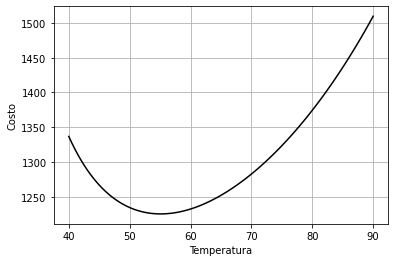

In [1]:
import matplotlib.pyplot as plt
import numpy as np

a = 40
b = 90
T = np.linspace(a, b, 100)
U = (204165.5)/(330-2*T) + (10400)/(T-20)

plt.figure()
plt.plot(T, U, 'k')
plt.xlabel('Temperatura')
plt.ylabel('Costo')
plt.grid()
plt.show()

In [2]:
import sympy

def calcularGradiente():
    T = sympy.Symbol('T')
    fU = (204165.5)/(330-2*T) + (10400)/(T-20)
    
    d1fU = sympy.diff(fU)
    
    print(fU)
    print(d1fU)
    
    return None

calcularGradiente()

10400/(T - 20) + 204165.5/(330 - 2*T)
-10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2


In [3]:
def U(T):
    return 10400/(T - 20) + 204165.5/(-2*T + 330)

U(55.08)

1225.1656408350887

In [4]:
def d1U(T):
    return -10400/(T - 20)**2 + 408331.0/(-2*T + 330)**2

d1U(55.08)

-0.0022423688924249063